___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
#pip install pandas_datareader

In [195]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [130]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [ ]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [132]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'stooq',start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [134]:
df.head(1)

Attributes    Close                                                  High  \
Symbols         BAC        C       GS      JPM       MS      WFC      BAC   
Date                                                                        
2006-01-03  39.6217  407.891  105.883  28.9771  38.2361  22.9581  39.7023   

Attributes                            ...     Open                            \
Symbols           C       GS     JPM  ...       GS      JPM       MS     WFC   
Date                                  ...                                      
2006-01-03  408.615  106.354  29.097  ...  104.109  28.7148  37.4934  22.743   

Attributes        Volume                                            \
Symbols              BAC             C            GS           JPM   
Date                                                                 
2006-01-03  1.936396e+07  1.858097e+06  7.508235e+06  1.780695e+07   

Attributes                              
Symbols               MS           WFC  
Date                                    
2006-01-03  6.806387e+06  1.530724e+07  

[1 rows x 30 columns]

In [144]:
df.dtypes

Attributes  Symbols
Close       BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
High        BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
Low         BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
Open        BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
Volume      BAC        float64
            C          float64
            GS         float64
            JPM        float64
            MS         float64
            WFC        float64
dtype: object

In [146]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

** Set the column name levels (this is filled out for you):**

In [148]:
df.columns.names = ['Stock Info','Bank Ticker']

** Check the head of the bank_stocks dataframe.**

In [153]:
df.head(1)

Stock Info     Close                                                  High  \
Bank Ticker      BAC        C       GS      JPM       MS      WFC      BAC   
Date                                                                         
2006-01-03   39.6217  407.891  105.883  28.9771  38.2361  22.9581  39.7023   

Stock Info                             ...     Open                            \
Bank Ticker        C       GS     JPM  ...       GS      JPM       MS     WFC   
Date                                   ...                                      
2006-01-03   408.615  106.354  29.097  ...  104.109  28.7148  37.4934  22.743   

Stock Info         Volume                                            \
Bank Ticker           BAC             C            GS           JPM   
Date                                                                  
2006-01-03   1.936396e+07  1.858097e+06  7.508235e+06  1.780695e+07   

Stock Info                               
Bank Ticker            MS           WFC  
Date                                     
2006-01-03   6.806387e+06  1.530724e+07  

[1 rows x 30 columns]

In [155]:
df.dtypes

Stock Info  Bank Ticker
Close       BAC            float64
            C              float64
            GS             float64
            JPM            float64
            MS             float64
            WFC            float64
High        BAC            float64
            C              float64
            GS             float64
            JPM            float64
            MS             float64
            WFC            float64
Low         BAC            float64
            C              float64
            GS             float64
            JPM            float64
            MS             float64
            WFC            float64
Open        BAC            float64
            C              float64
            GS             float64
            JPM            float64
            MS             float64
            WFC            float64
Volume      BAC            float64
            C              float64
            GS             float64
            JPM            floa

In [161]:
df = df.swaplevel('Stock Info', 'Bank Ticker', axis = 1)

In [163]:
df.dtypes

Bank Ticker  Stock Info
BAC          Close         float64
C            Close         float64
GS           Close         float64
JPM          Close         float64
MS           Close         float64
WFC          Close         float64
BAC          High          float64
C            High          float64
GS           High          float64
JPM          High          float64
MS           High          float64
WFC          High          float64
BAC          Low           float64
C            Low           float64
GS           Low           float64
JPM          Low           float64
MS           Low           float64
WFC          Low           float64
BAC          Open          float64
C            Open          float64
GS           Open          float64
JPM          Open          float64
MS           Open          float64
WFC          Open          float64
BAC          Volume        float64
C            Volume        float64
GS           Volume        float64
JPM          Volume        floa

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [175]:
df.xs(key = 'Close', #value to look for
      axis= 1, # where to look for it
      level = 'Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [177]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [181]:
for tick in tickers:
    returns[tick + ' Return'] = df[tick]['Close'].pct_change()


C:\Users\Admin\AppData\Local\Temp\ipykernel_55132\284561699.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns[tick + ' Return'] = df[tick]['Close'].pct_change()


In [183]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [185]:
import seaborn as sns

In [199]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

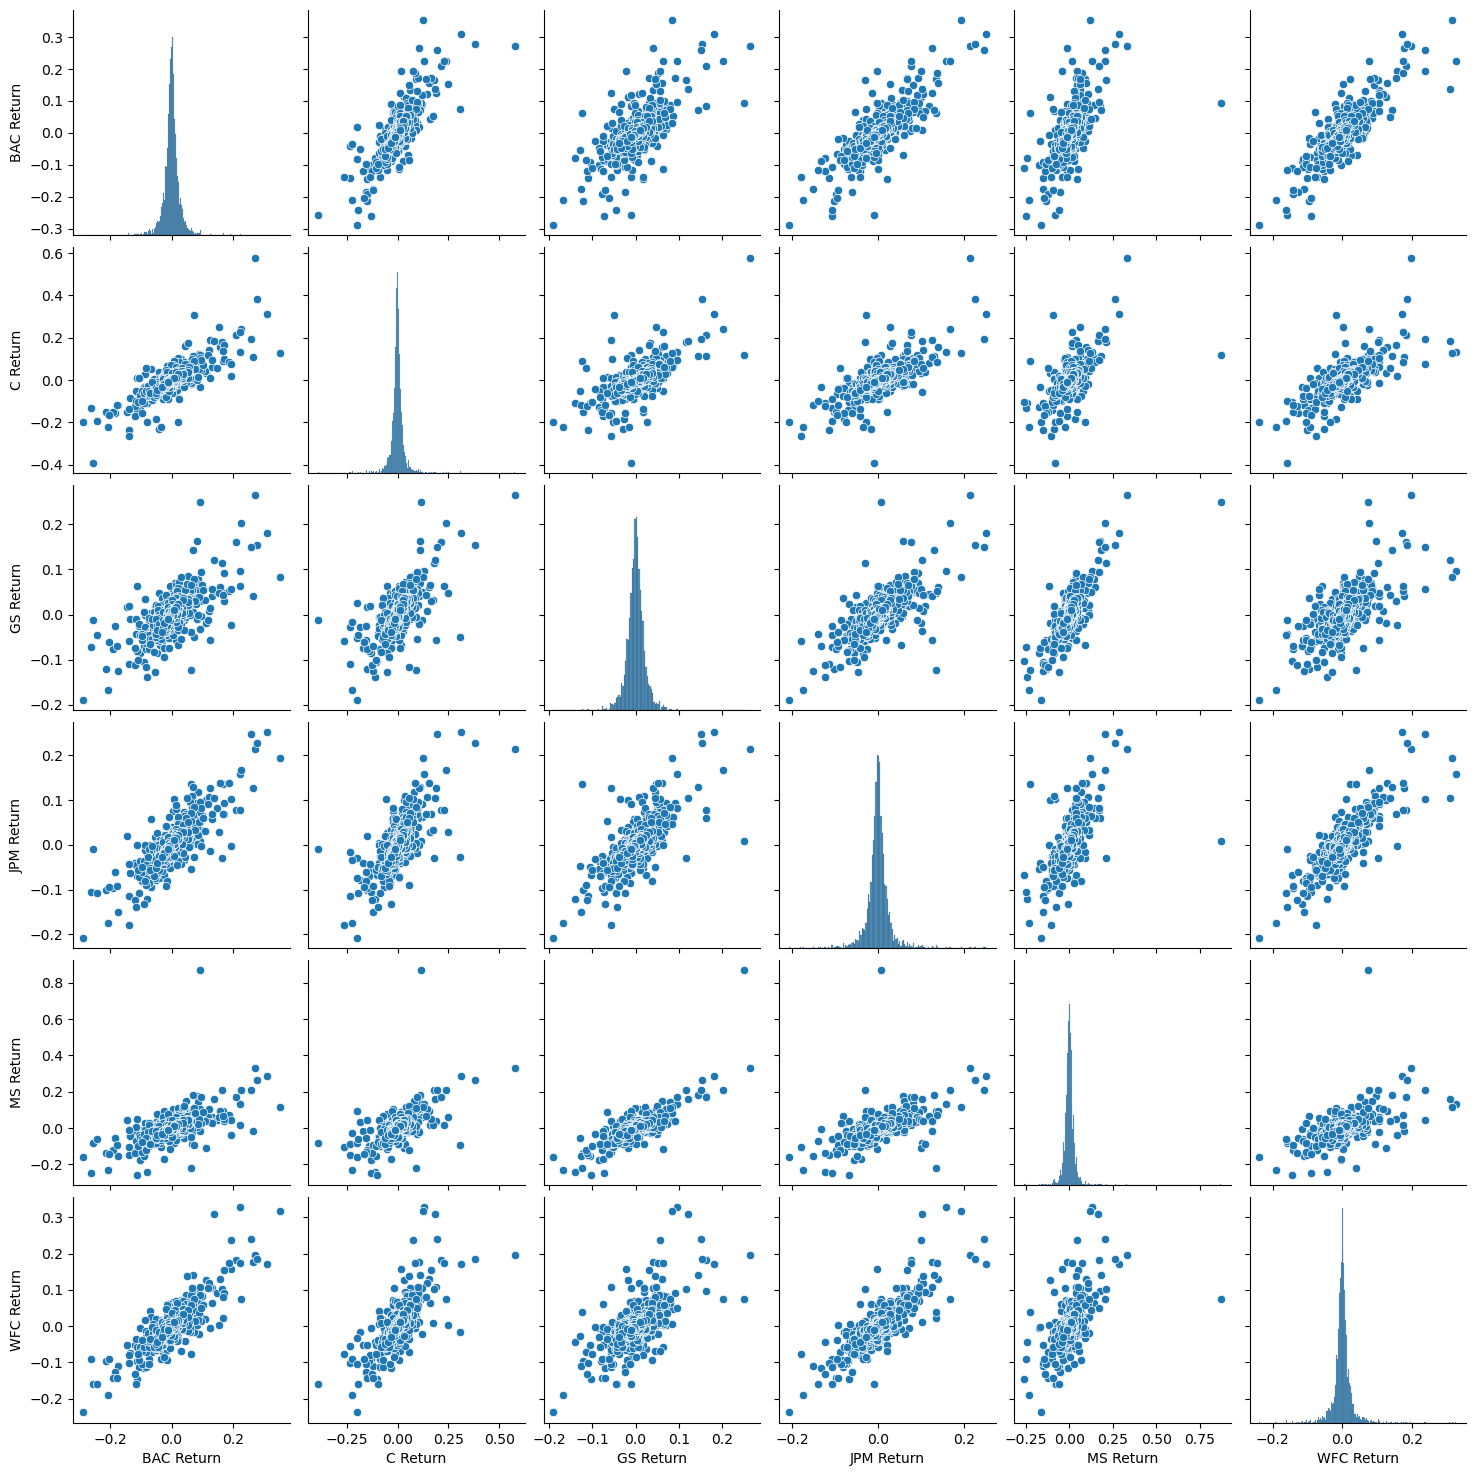

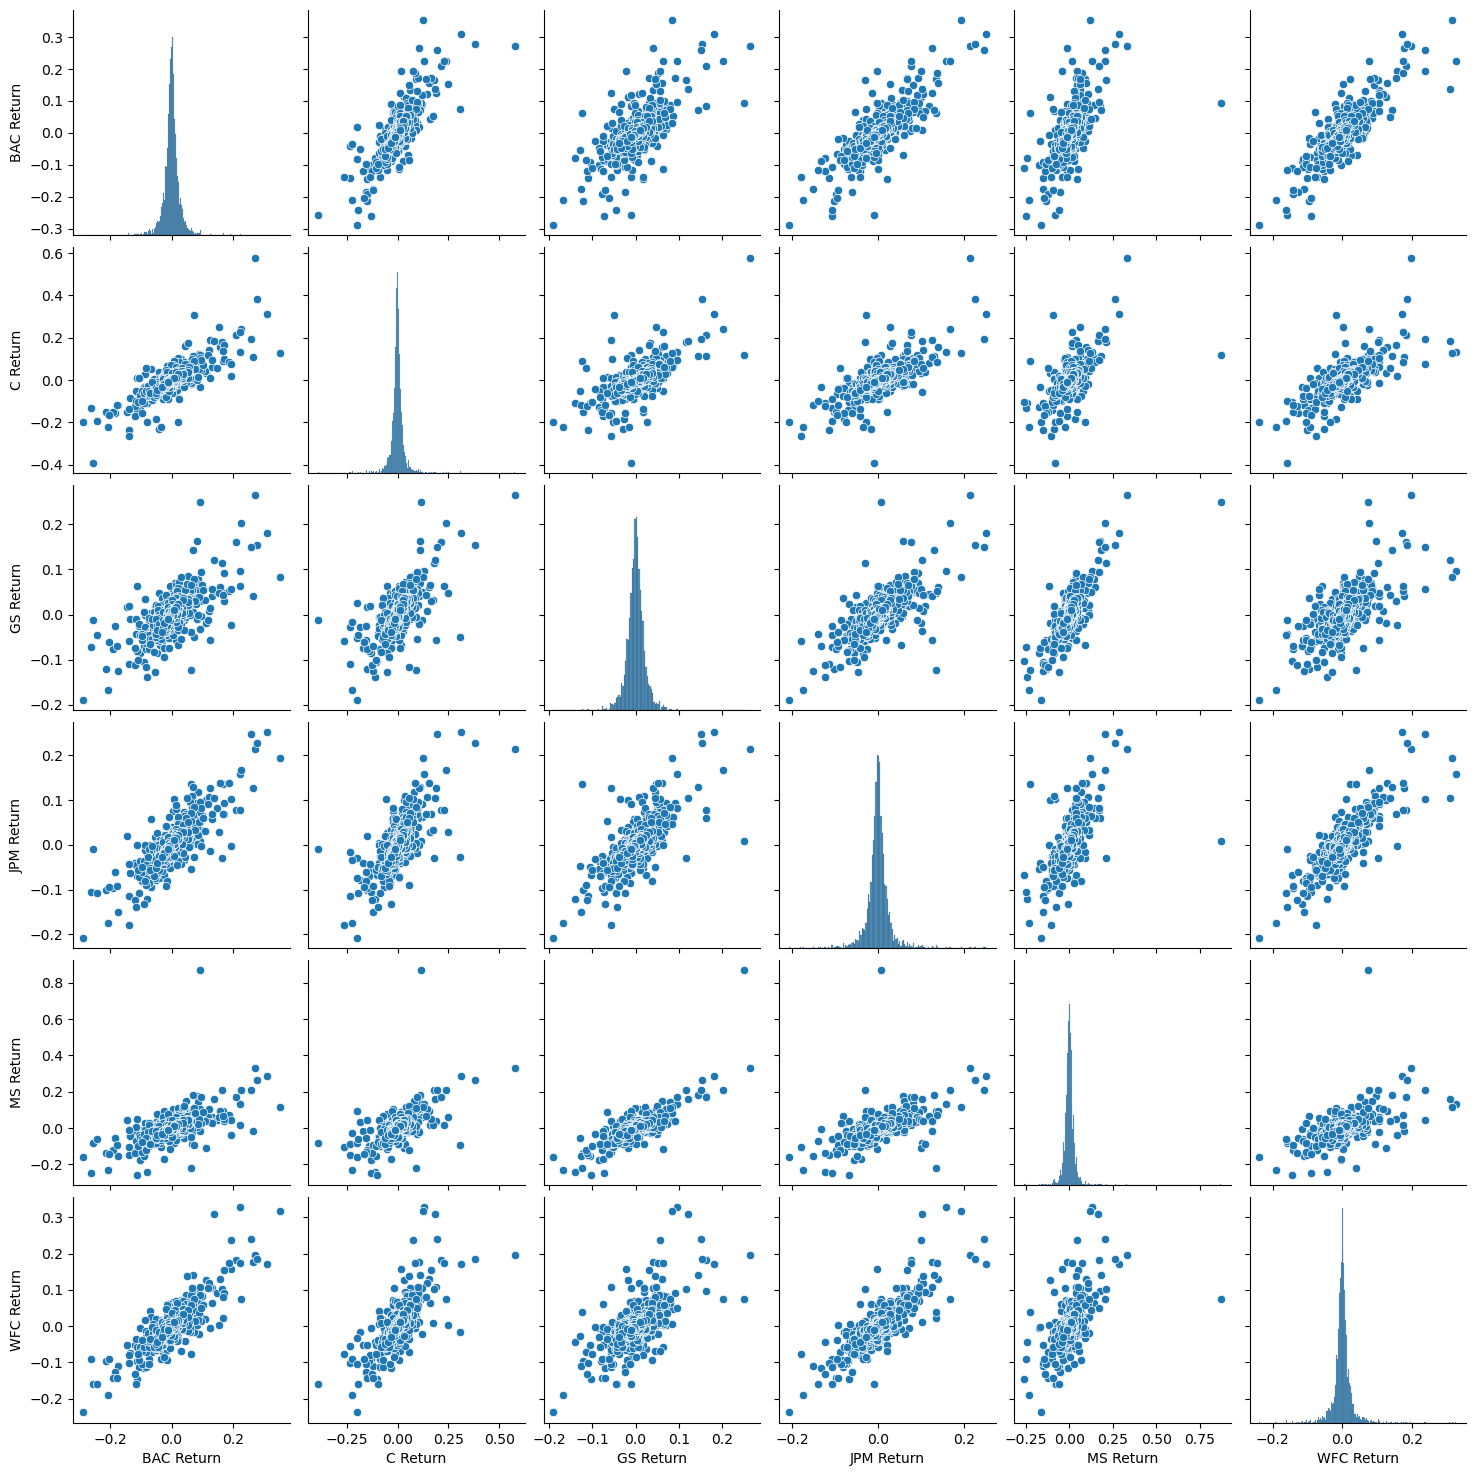

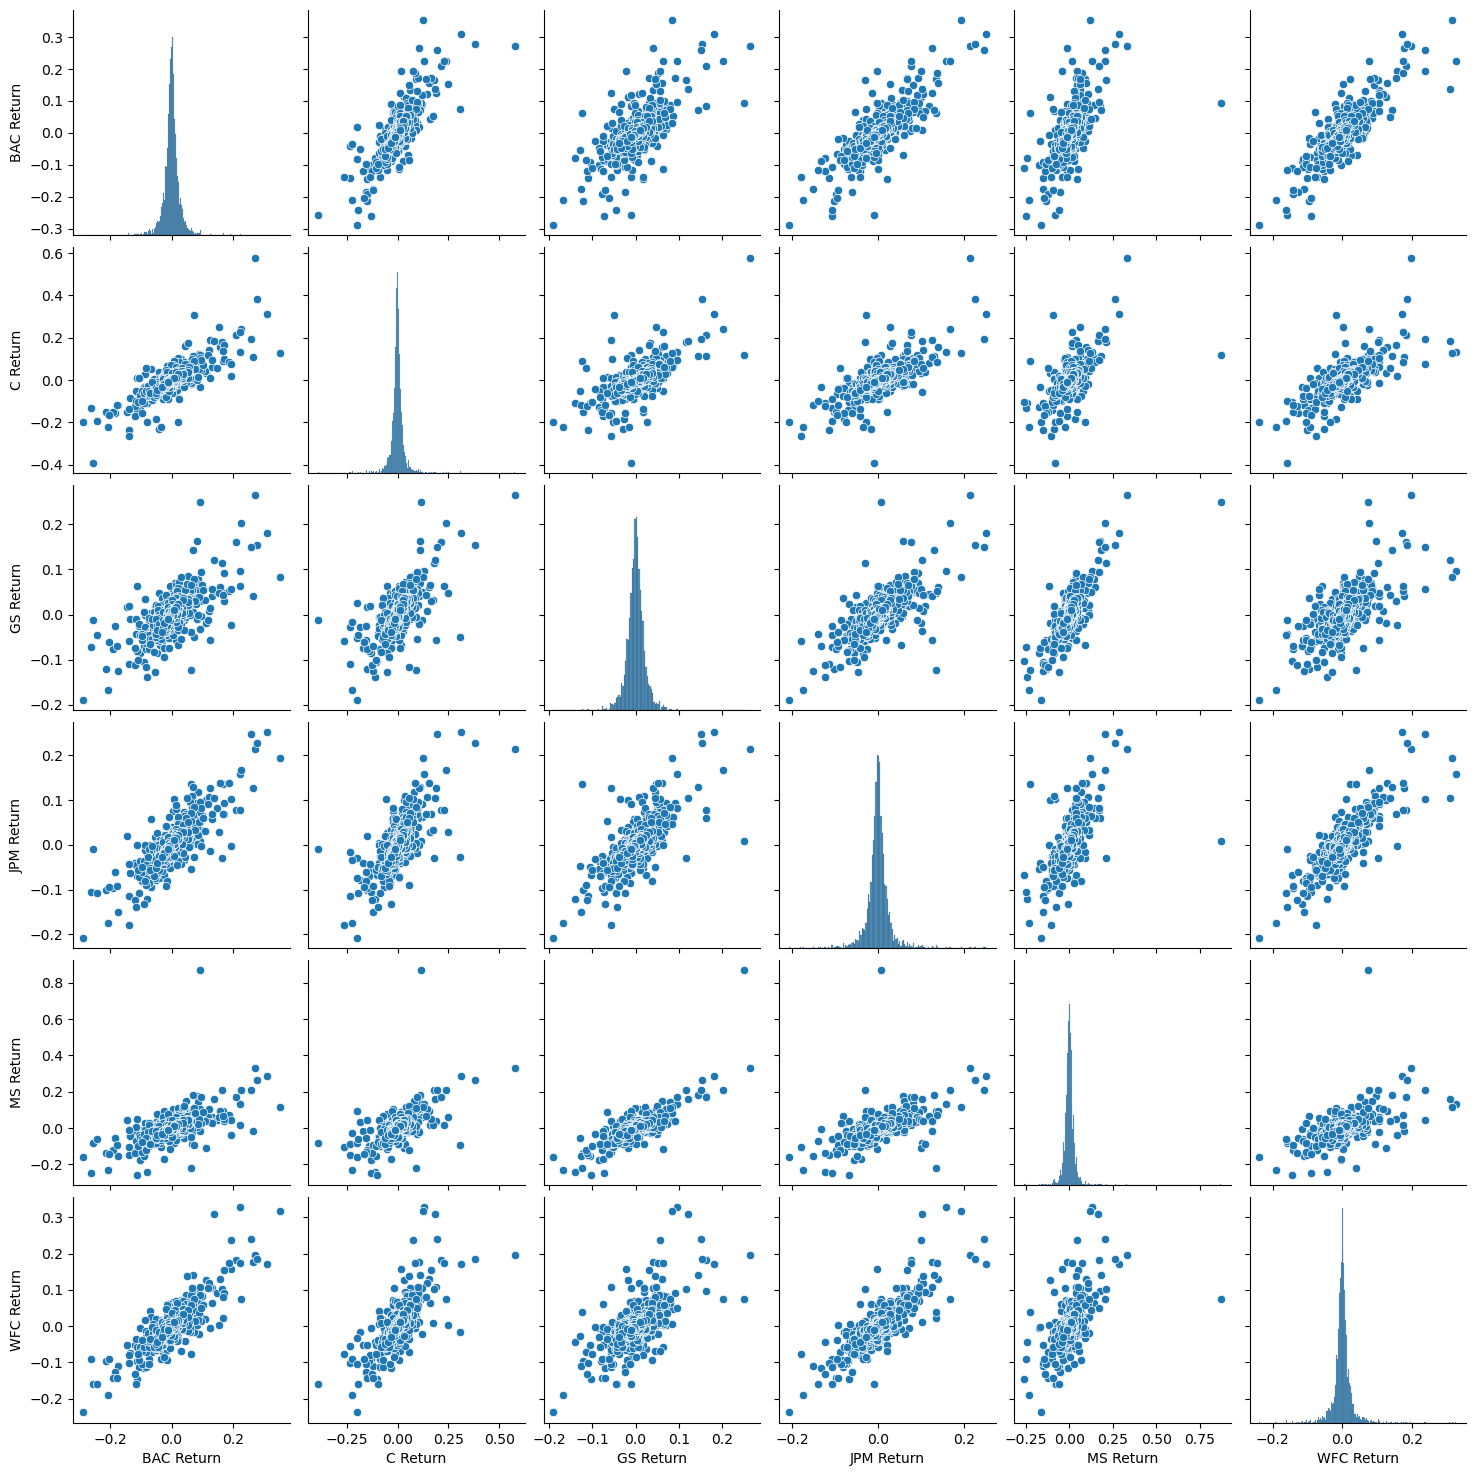

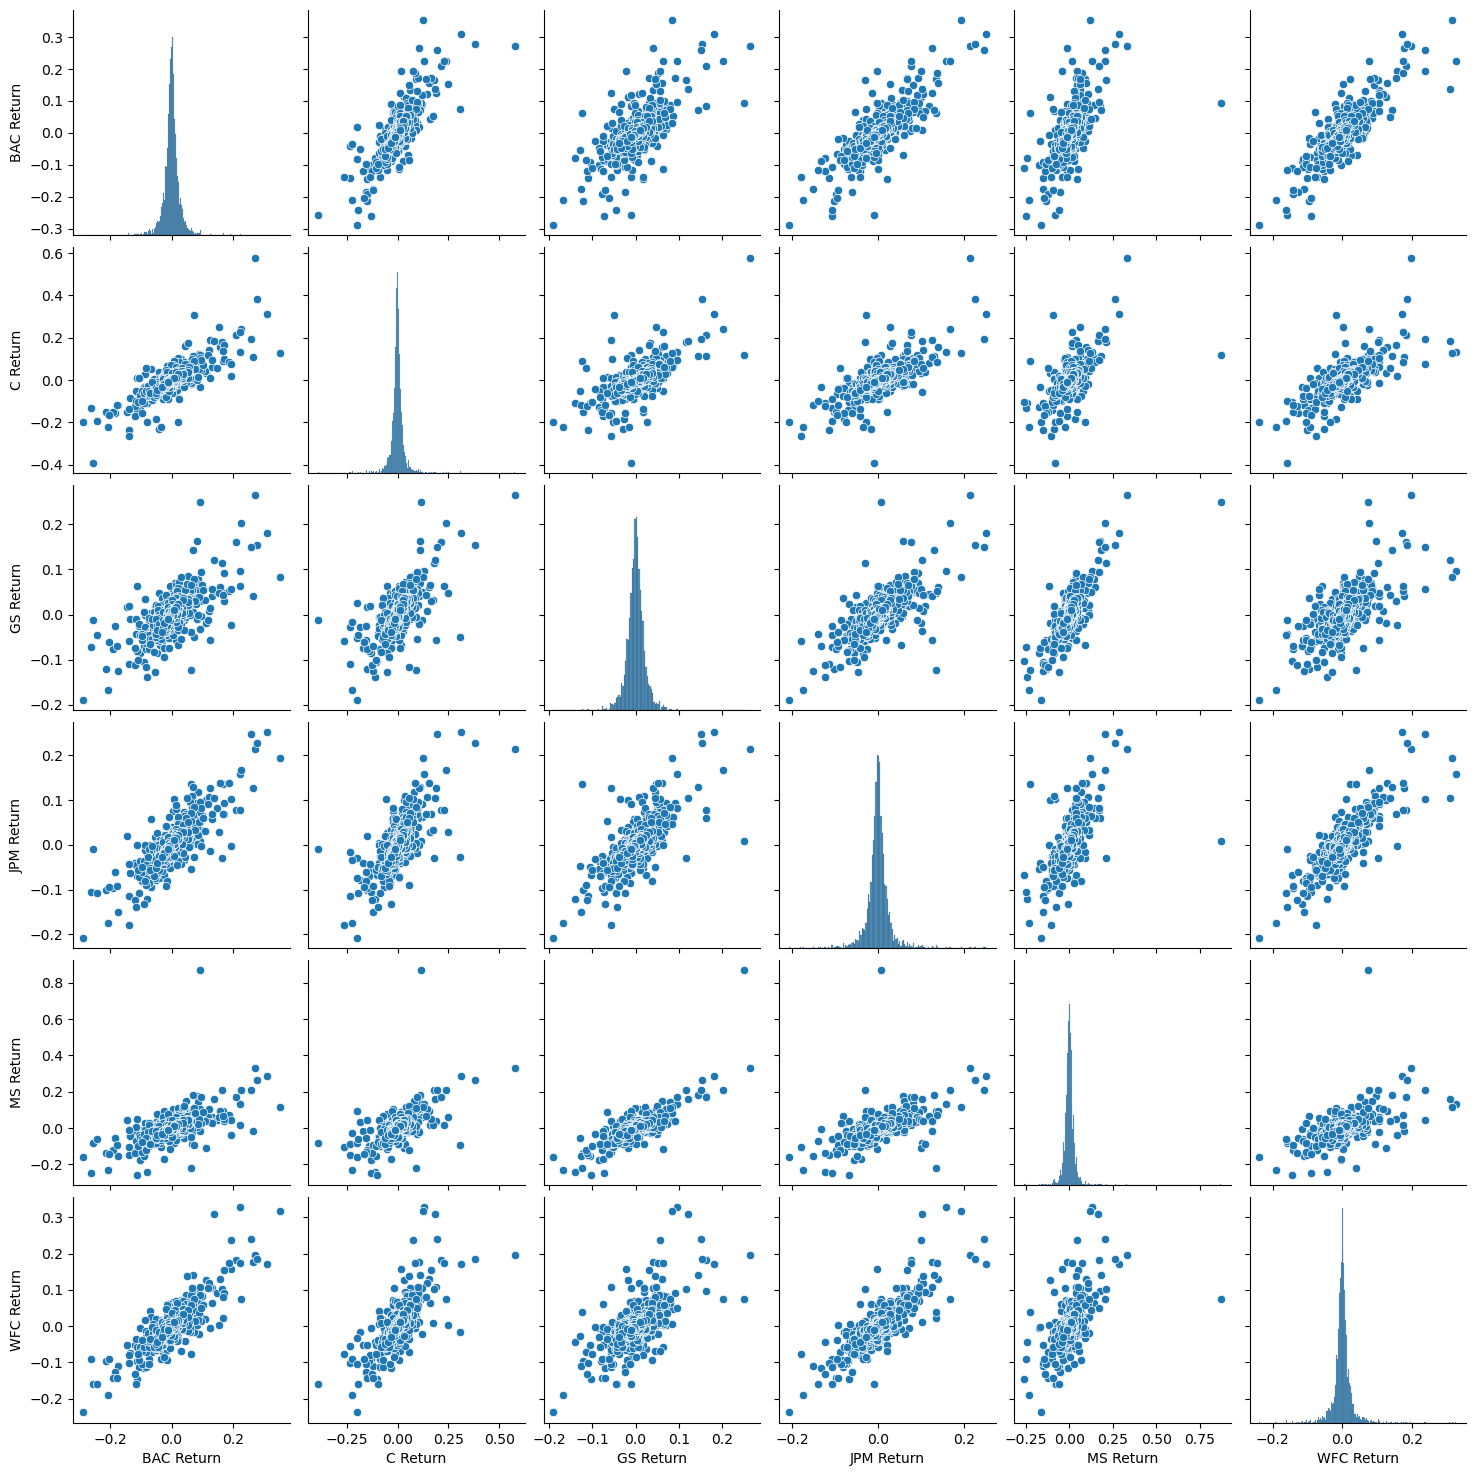

In [203]:
sns.pairplot(returns)
plt.show()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [207]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [223]:
returns.idxmax(axis = 0)

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [225]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [231]:
returns['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

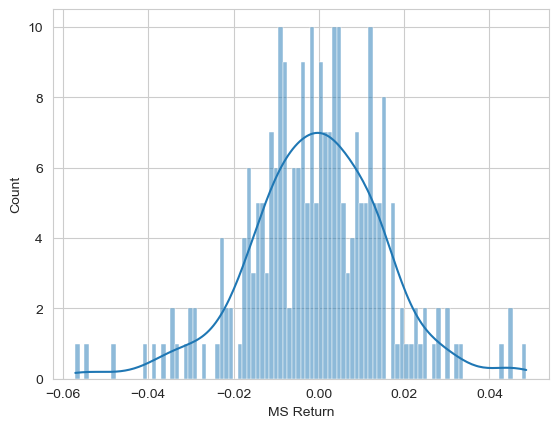

In [249]:
sns.set_style('whitegrid')
sns.histplot(returns['2015-01-01':'2015-12-31']['MS Return'], bins = 100, kde = True)
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

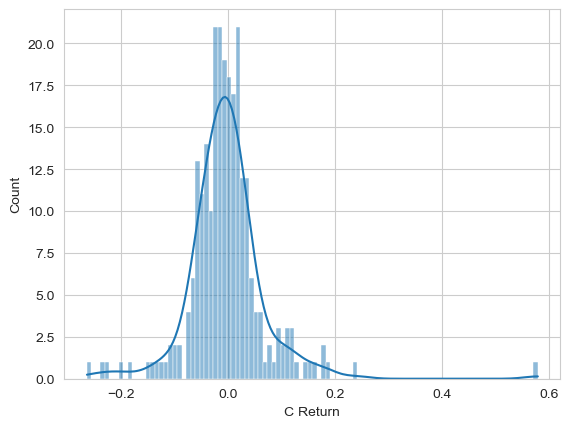

In [253]:
sns.histplot(returns['2008-01-01':'2008-12-31']['C Return'], bins = 100, kde = True)
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

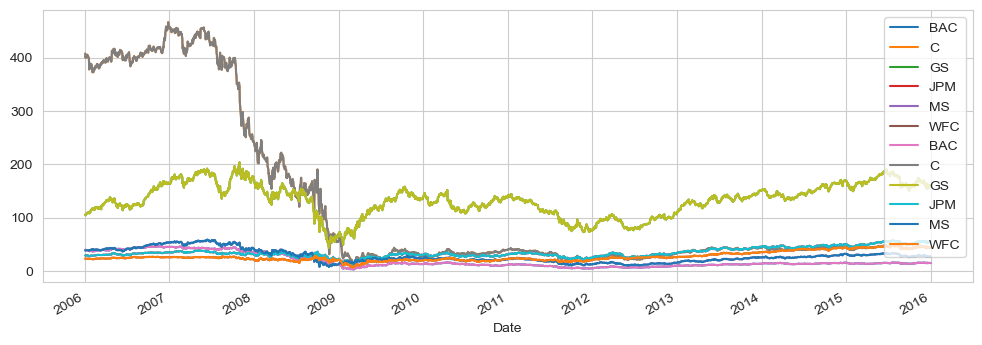

In [262]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.show()

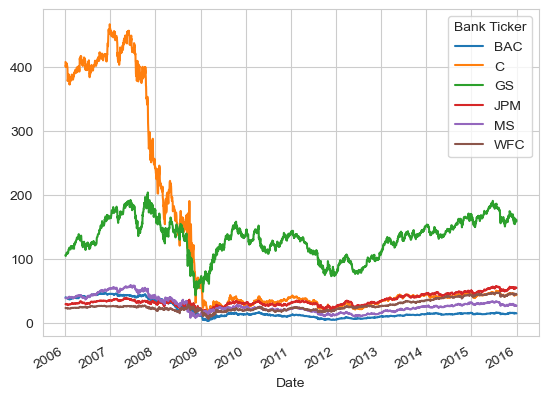

In [268]:
df.xs(key = 'Close', axis = 1, level = 'Stock Info').plot()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



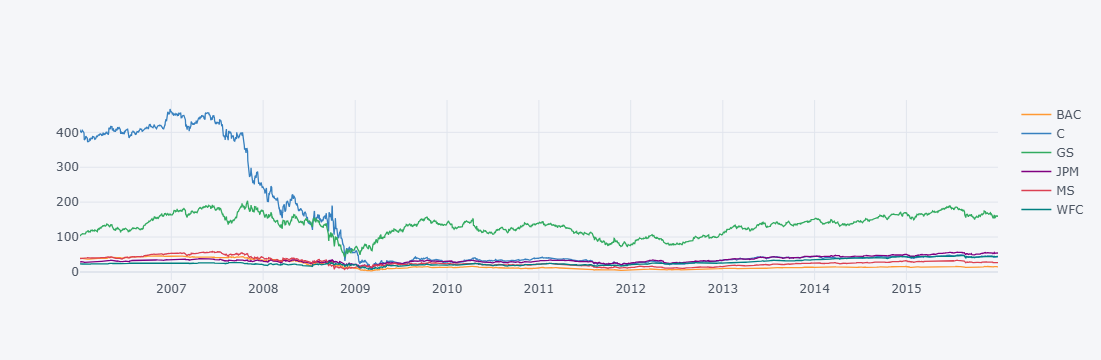

In [276]:
# plotly
df.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

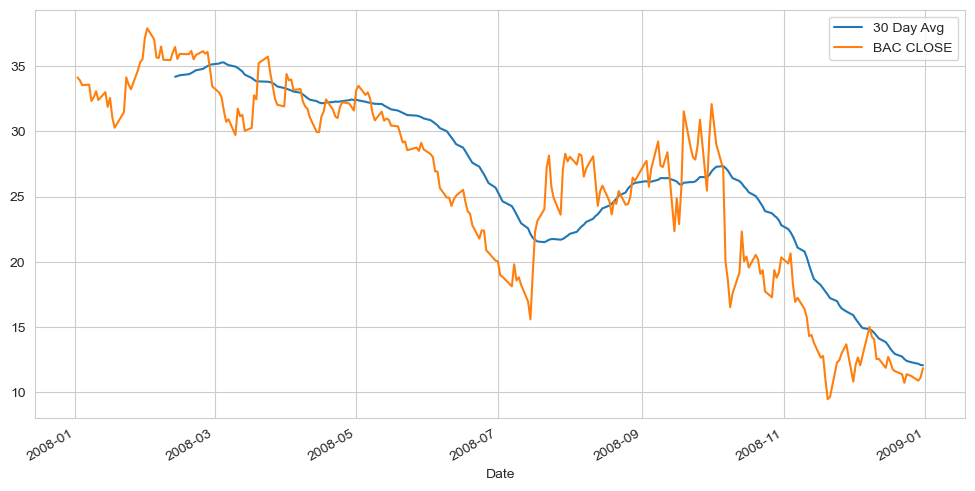

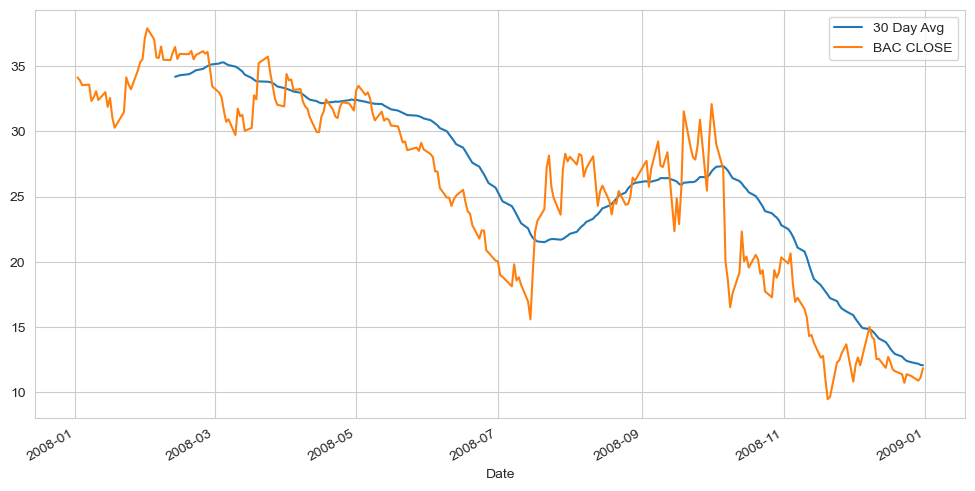

In [292]:
plt.figure(figsize=(12,6))
df['BAC']['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['BAC']['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

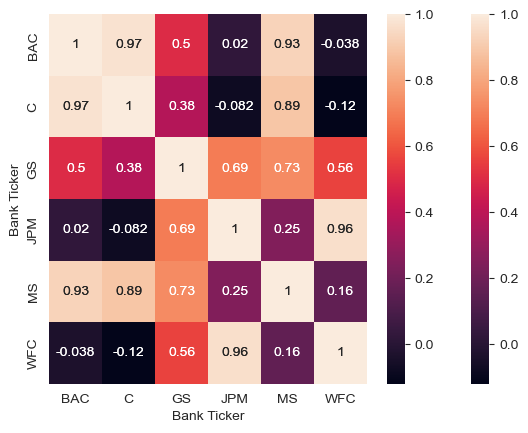

In [296]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

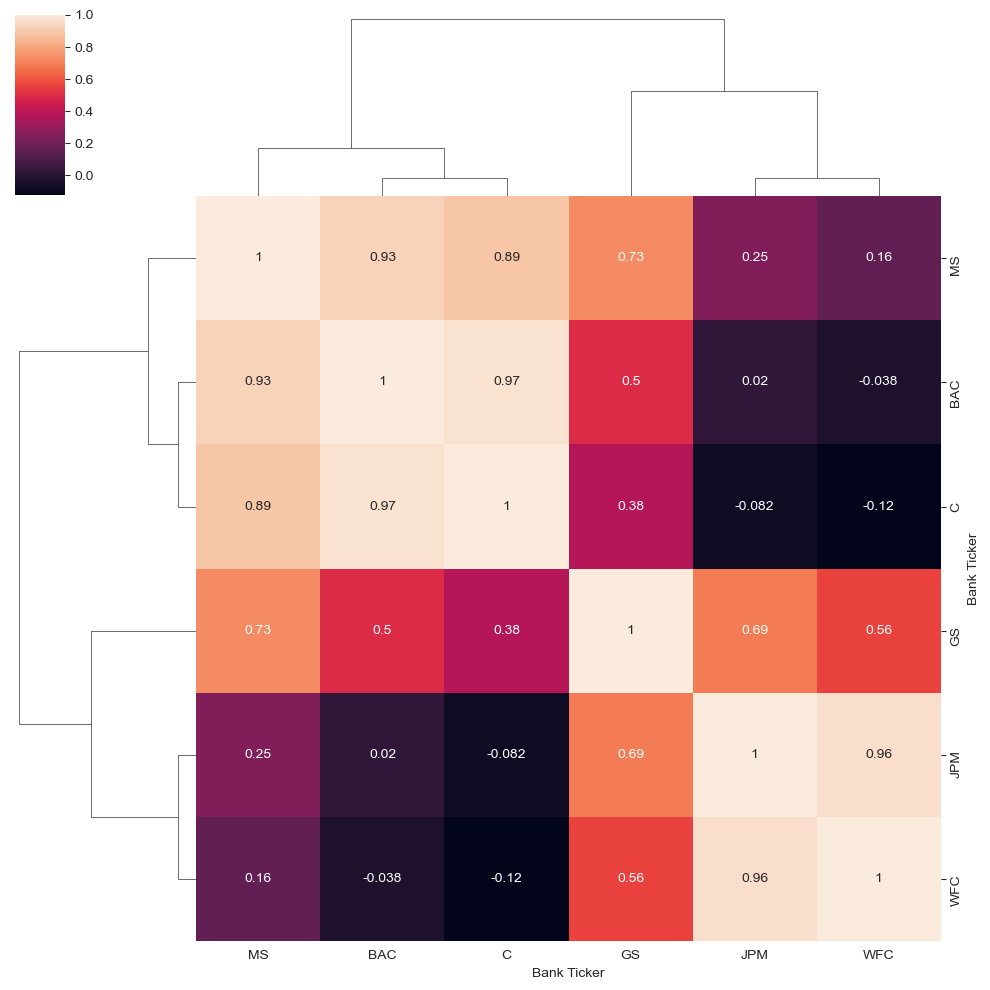

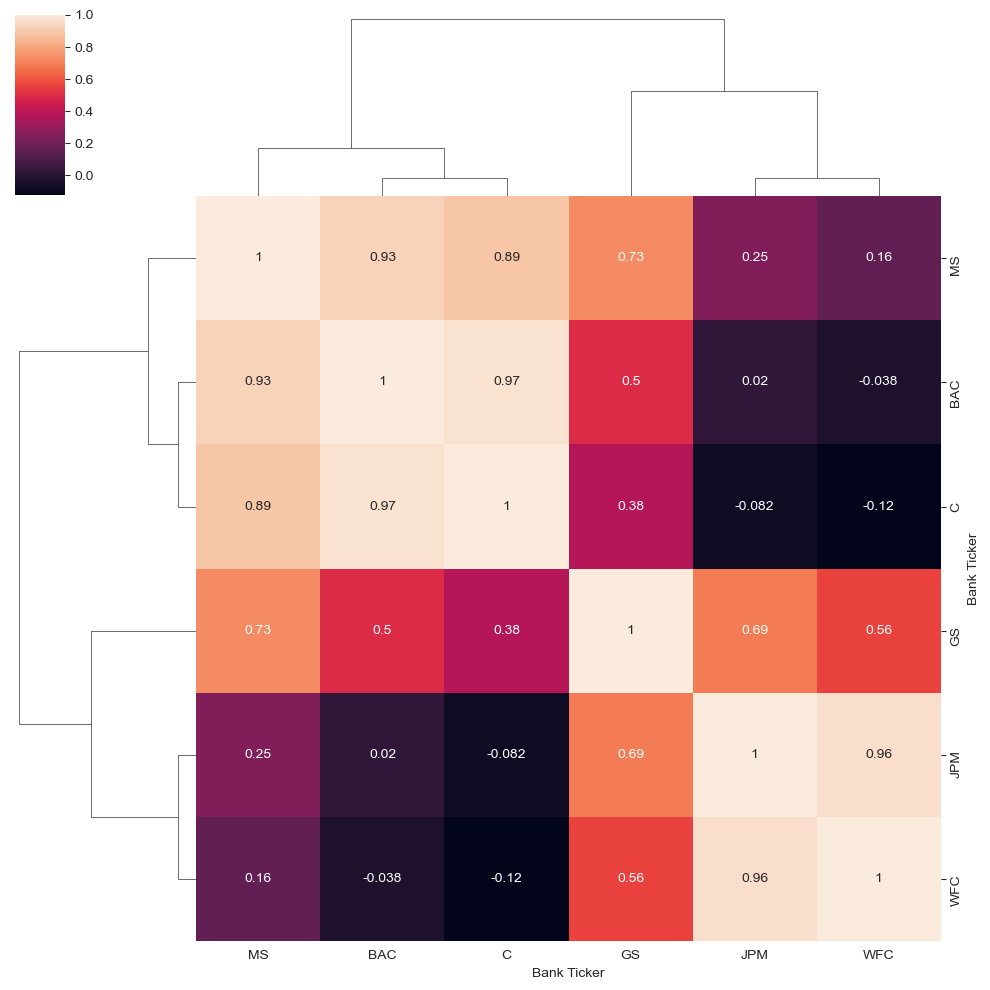

In [300]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

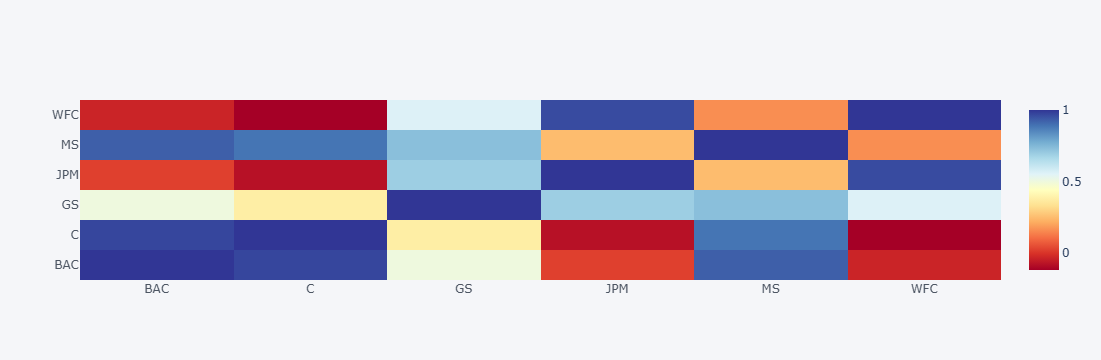

In [304]:
close_corr = df.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

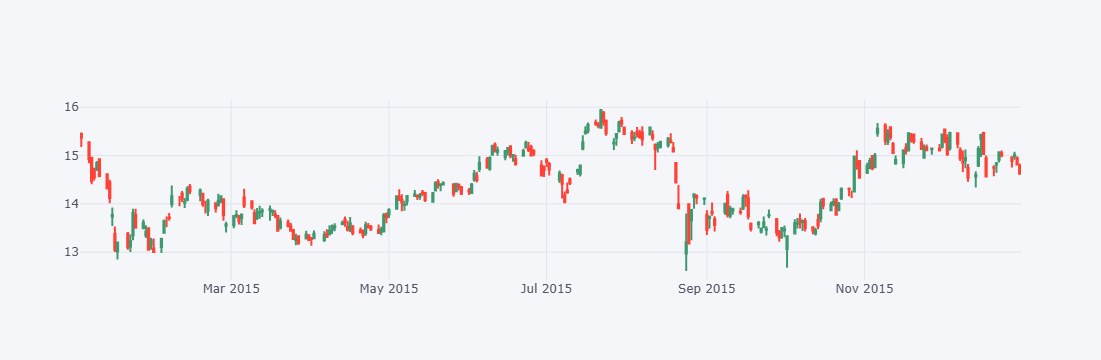

In [308]:
df['BAC'][['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

C:\Users\Admin\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\Admin\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



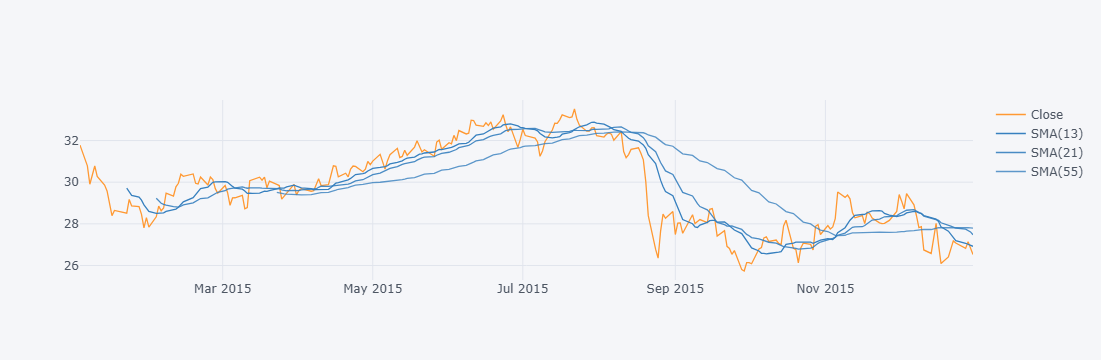

In [310]:
df['MS']['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

C:\Users\Admin\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\Admin\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



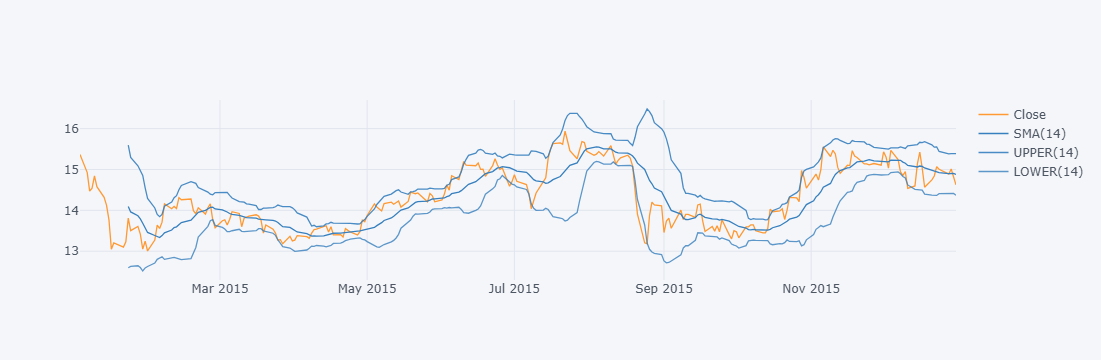

In [314]:
df['BAC']['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.